<a href="https://colab.research.google.com/github/sarveshc30/CustomerChurn/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Dataset

In [35]:
!pip install kaggle
! mkdir ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [36]:
! kaggle datasets download shantanudhakadd/bank-customer-churn-prediction

Dataset URL: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction
License(s): other
bank-customer-churn-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [37]:
!unzip bank-customer-churn-prediction.zip

Archive:  bank-customer-churn-prediction.zip
replace Churn_Modelling.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# Importing Libraries and Data

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [39]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [40]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Removing redundant Parameters

In [41]:
df.drop('RowNumber', axis='columns', inplace = True)
df.drop('CustomerId', axis='columns', inplace = True)
df.drop('Surname', axis='columns', inplace = True)

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Visualizing Data

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


<Axes: xlabel='Gender'>

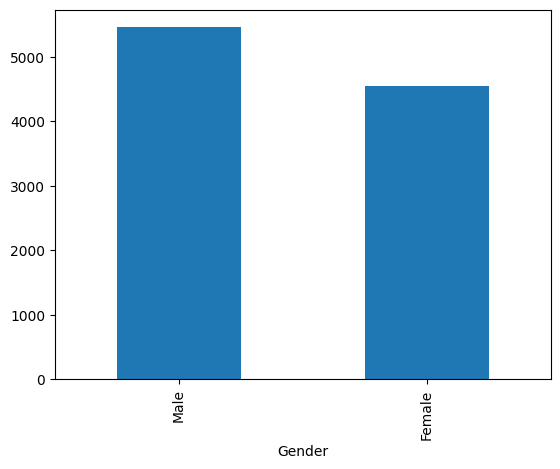

In [43]:
df['Gender'].value_counts().plot(kind='bar')

<Axes: ylabel='Geography'>

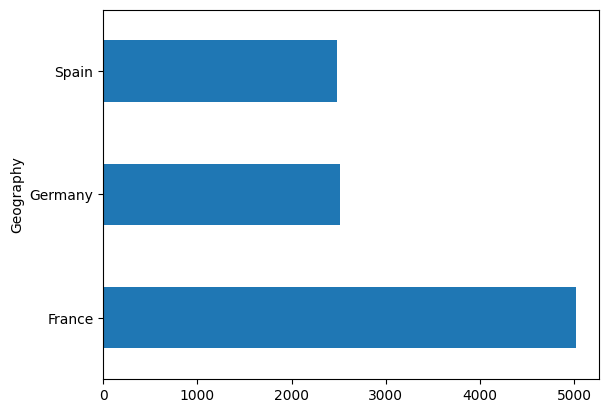

In [44]:
df['Geography'].value_counts().plot(kind='barh')

<Axes: ylabel='Exited'>

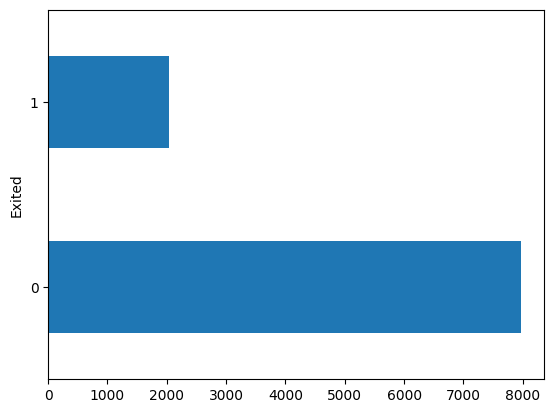

In [45]:
df['Exited'].value_counts().plot(kind='barh')

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

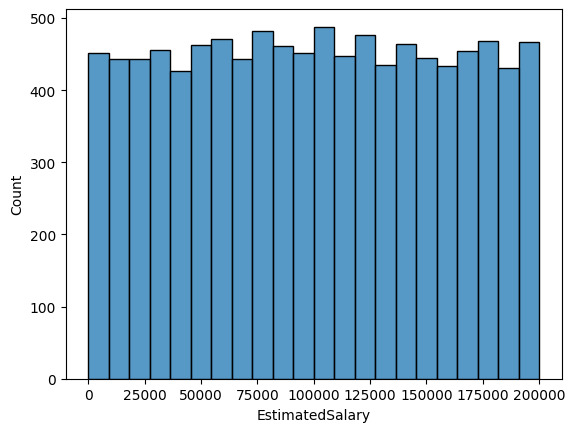

In [46]:
sns.histplot(df['EstimatedSalary'])

Checking for duplicates

In [47]:
pd.value_counts(df.duplicated())

<ipython-input-47-e6b28e2d5271>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df.duplicated())


,count
False,10000


In [48]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


Convering Geagraphy and Gender to Numeric Data

In [49]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first=True, )

In [50]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


Train test split

In [52]:
data = df.drop('Exited', axis='columns')
label = df['Exited']
data_train, data_test, label_train, label_test = train_test_split(data, label, train_size = 0.7, shuffle = True, random_state=1)

In [55]:
data_train.shape

(7000, 11)

Scaling

Transformoing into an array

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

In [59]:
data_train

array([[-0.06042858, -0.18527928,  1.02868011, ..., -0.58350885,
        -0.57273139, -1.08628092],
       [-1.74363086,  0.00532326,  0.33476465, ..., -0.58350885,
        -0.57273139, -1.08628092],
       [ 0.31132161, -0.18527928,  1.72259557, ..., -0.58350885,
        -0.57273139, -1.08628092],
       ...,
       [ 0.22871046,  0.57713088,  1.37563784, ..., -0.58350885,
        -0.57273139, -1.08628092],
       [ 0.13577291,  0.00532326,  1.02868011, ..., -0.58350885,
        -0.57273139, -1.08628092],
       [ 1.16841234,  0.29122707,  0.33476465, ...,  1.71377008,
        -0.57273139,  0.92057219]])

# Model Creation

In [61]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [64]:
model = Sequential()
model.add(Dense(10, activation = 'relu', input_dim = 11))
model.add(Dense(5, activation = 'relu', input_dim = 11))
model.add(Dense(1, activation = 'sigmoid'))

print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [65]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy',
    tf.keras.metrics.AUC(name = 'auc')]
)

In [66]:
history = model.fit(
    data_train,
    label_train,
    validation_split = 0.2,
    batch_size = 32,
    epochs = 100,
    # Callbacks tell the model to stop training after certain conditions are met
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            patience = 3,
            restore_best_weights = True
        )
    ]
)

Epoch 1/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7792 - auc: 0.5773 - loss: 0.5359 - val_accuracy: 0.8000 - val_auc: 0.6949 - val_loss: 0.4648
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8114 - auc: 0.7247 - loss: 0.4364 - val_accuracy: 0.8086 - val_auc: 0.7399 - val_loss: 0.4418
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8038 - auc: 0.7508 - loss: 0.4395 - val_accuracy: 0.8143 - val_auc: 0.7534 - val_loss: 0.4341
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8181 - auc: 0.7695 - loss: 0.4186 - val_accuracy: 0.8150 - val_auc: 0.7618 - val_loss: 0.4288
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8210 - auc: 0.7806 - loss: 0.4177 - val_accuracy: 0.8214 - val_auc: 0.7683 - val_loss: 0.4245
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8178 - auc: 0.7857 - loss: 0.4169 - val_accuracy: 0.8264 - val_auc: 0.7744 - val_loss: 0.4203
Epoch 7/100
175/175 ━━━━━━━━━━━━━━

# Loss

Text(0.5, 1.0, 'Loss')

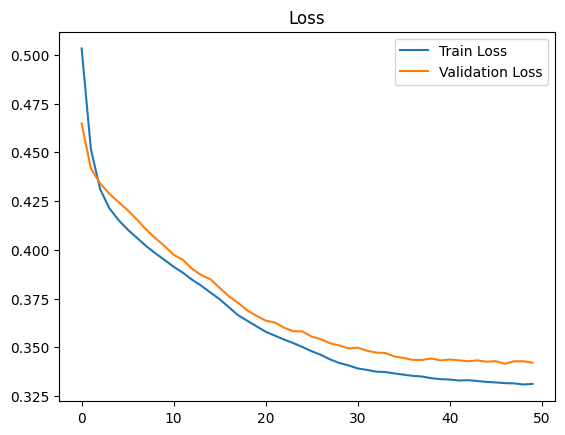

In [68]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

# Accuracy

Text(0.5, 1.0, 'Accuracy')

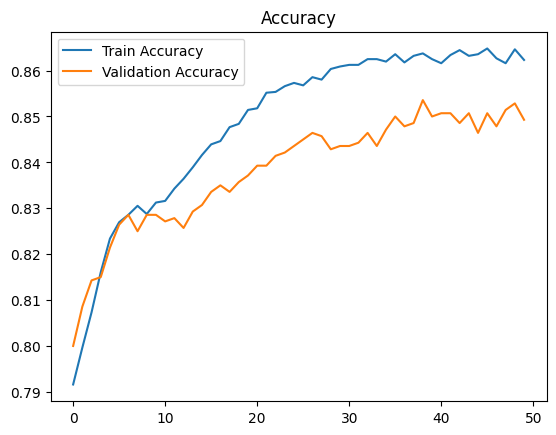

In [67]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Evaluating Model using Test set

In [69]:
results = model.evaluate(data_test, label_test, verbose = 0)
print("Test Loss: ", (results[0]))
print("Test Accuracy: ", results[1])

Test Loss:  0.34804922342300415
Test Accuracy:  0.8560000061988831
